In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./data/cleaned_test_lyrics.csv', encoding='latin1')
df.head()

,Unnamed: 0,Lyric,genre
0,0,can you hear me call your name Im not far away...,Metal
1,1,You say you are so clever You beleive that you...,Metal
2,2,Walking across these misery plains When all fo...,Metal
3,3,Fuck you you bitch get out of my head Twisting...,Metal
4,4,Crashing forth upon the soil Filthy waves gave...,Metal


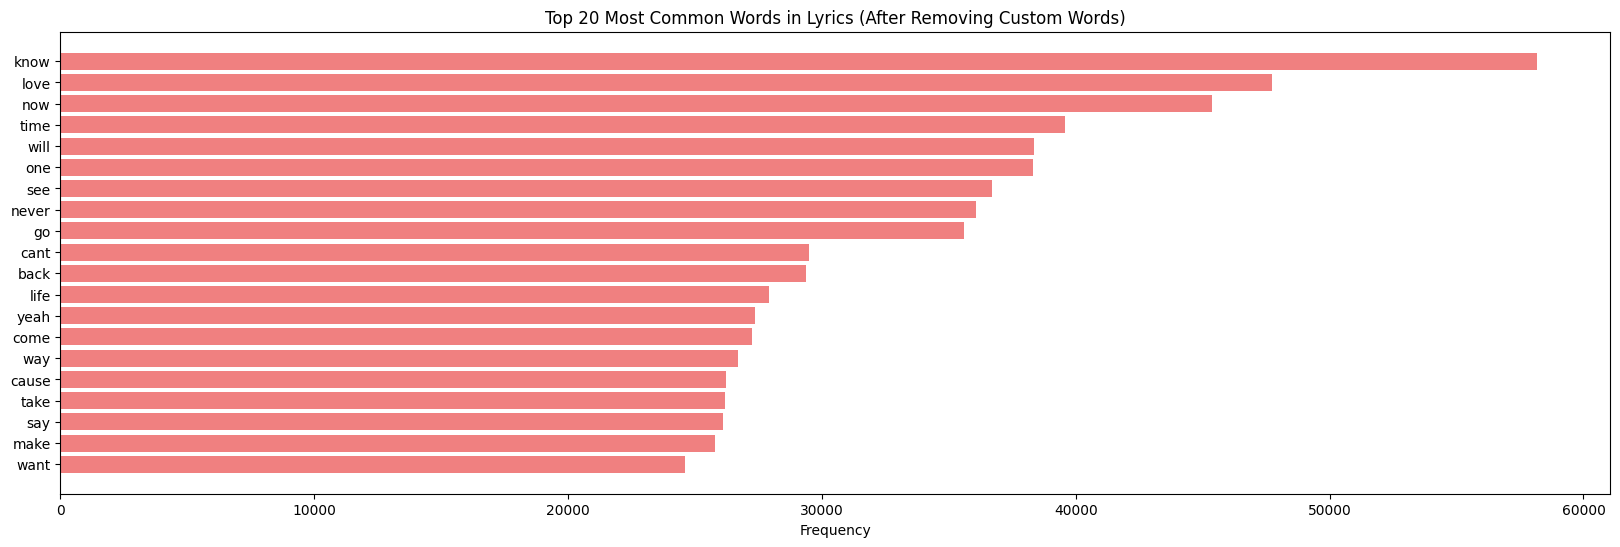

In [11]:
import pandas as pd
from collections import Counter
from wordcloud import STOPWORDS
import string
import re
import matplotlib.pyplot as plt

def clean_lyrics(lyrics):
    lyrics = lyrics.lower() 
    lyrics = re.sub(f'[{string.punctuation}]', '', lyrics)  
    words = lyrics.split()  
    words = [word for word in words if word not in STOPWORDS]  
    return words

def remove_custom_words(lyrics, custom_words):
    lyrics = clean_lyrics(lyrics)  
    return ' '.join([word for word in lyrics if word not in custom_words])

custom_words_to_remove = ['he', 'her', 'it', 'and', 'the', 'you', 'i', 'we', 'im', 'dont', 'got', 'verse', 'chorus', 'youre', 'oh', 'ill']

df['cleaned_lyrics'] = df['Lyric'].apply(lambda x: remove_custom_words(x, custom_words_to_remove))

cleaned_words = []
df['cleaned_lyrics'].apply(lambda x: cleaned_words.extend(x.split()))

cleaned_word_counts = Counter(cleaned_words)
cleaned_common_words = cleaned_word_counts.most_common(20)

words, counts = zip(*cleaned_common_words)
plt.figure(figsize=(20, 6))
plt.barh(words, counts, color='lightcoral')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words in Lyrics (After Removing Custom Words)')
plt.gca().invert_yaxis()
plt.show()


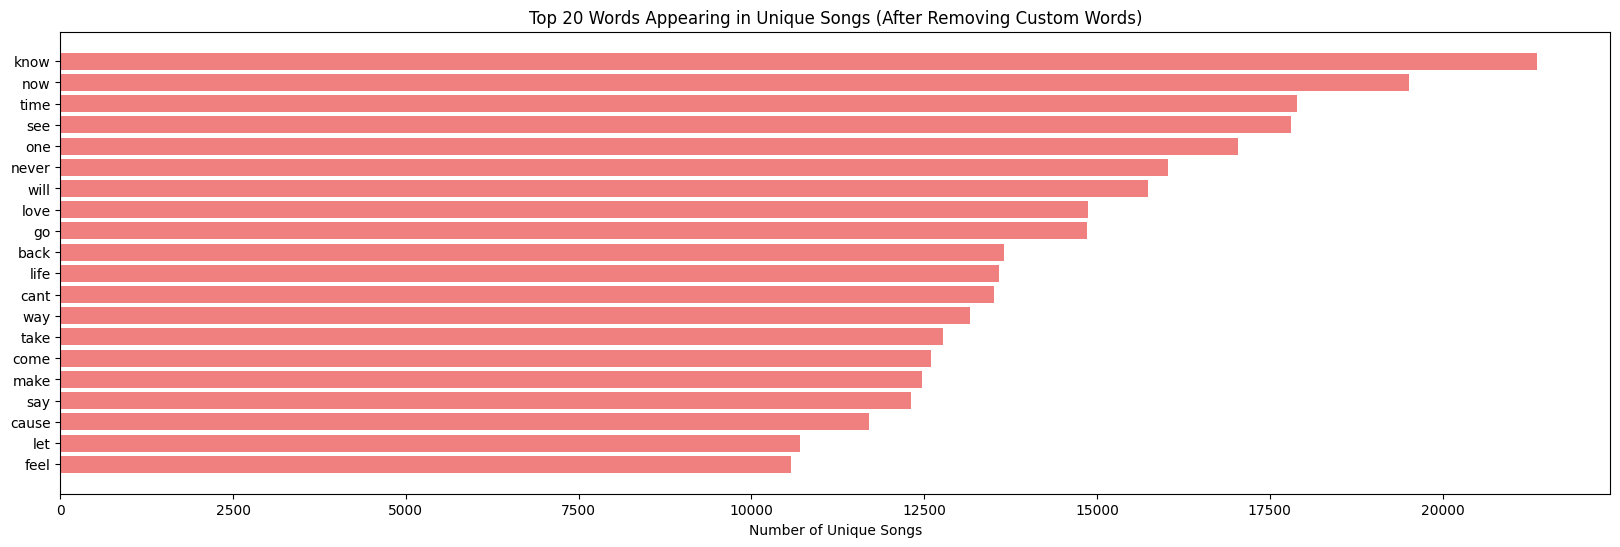

In [13]:
import pandas as pd
from collections import Counter
from wordcloud import STOPWORDS
import string
import re
import matplotlib.pyplot as plt

def clean_lyrics(lyrics):
    lyrics = lyrics.lower() 
    lyrics = re.sub(f'[{string.punctuation}]', '', lyrics)  
    words = lyrics.split()  
    words = [word for word in words if word not in STOPWORDS]  
    return words

def remove_custom_words(lyrics, custom_words):
    lyrics = clean_lyrics(lyrics)  
    return ' '.join([word for word in lyrics if word not in custom_words])

custom_words_to_remove = ['he', 'her', 'it', 'and', 'the', 'you', 'i', 'we', 'im', 'dont', 'got', 'verse', 'chorus', 'youre', 'oh', 'ill', '1', '2']

df['cleaned_lyrics'] = df['Lyric'].apply(lambda x: remove_custom_words(x, custom_words_to_remove))

word_in_songs = Counter()
for lyrics in df['cleaned_lyrics']:
    unique_words = set(lyrics.split())  
    word_in_songs.update(unique_words)  
common_words_in_songs = word_in_songs.most_common(20)

words, counts = zip(*common_words_in_songs)
plt.figure(figsize=(20, 6))
plt.barh(words, counts, color='lightcoral')
plt.xlabel('Number of Unique Songs')
plt.title('Top 20 Words Appearing in Unique Songs (After Removing Custom Words)')
plt.gca().invert_yaxis()
plt.show()


C:\Users\zaidf\AppData\Local\Temp\ipykernel_42576\3944390439.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='word_count', data=df, palette='coolwarm')


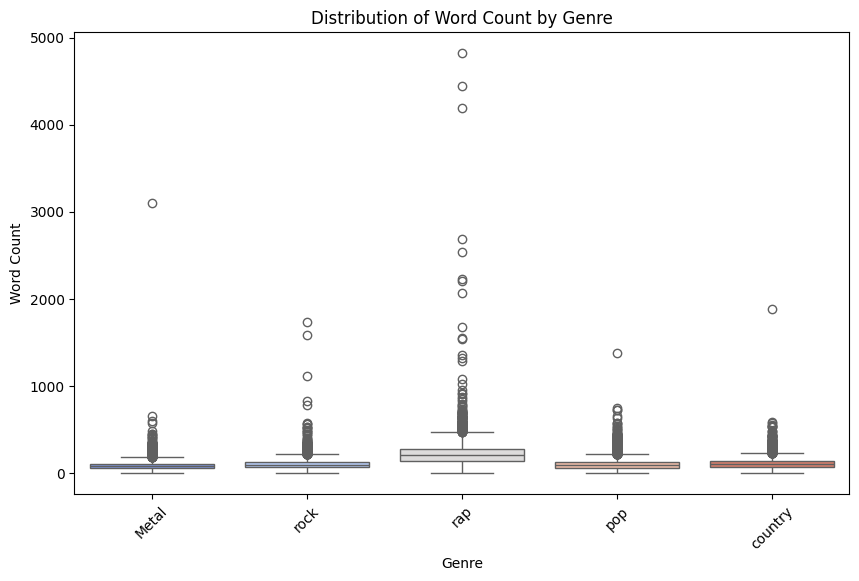

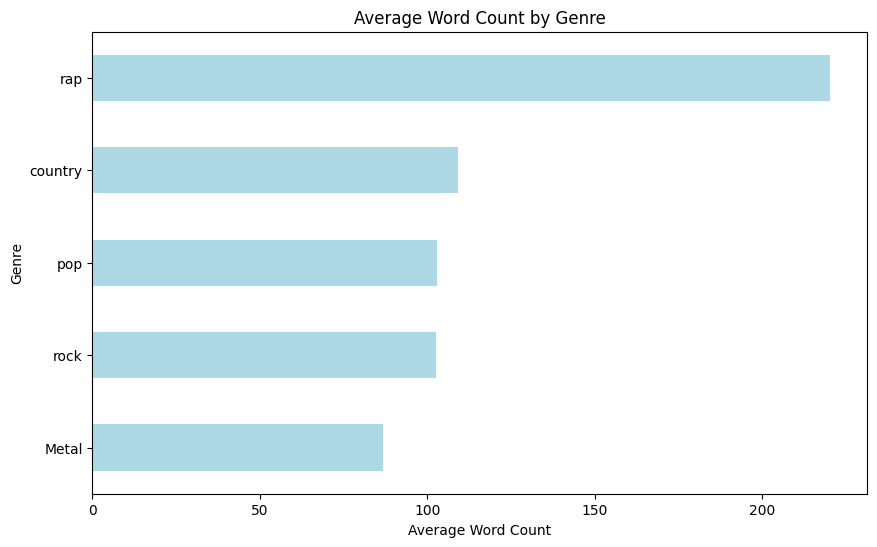

In [15]:
import seaborn as sns

df['word_count'] = df['cleaned_lyrics'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))

sns.boxplot(x='genre', y='word_count', data=df, palette='coolwarm')

plt.title('Distribution of Word Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
average_word_count_by_genre = df.groupby('genre')['word_count'].mean().sort_values()
average_word_count_by_genre.plot(kind='barh', color='lightblue')

plt.title('Average Word Count by Genre')
plt.xlabel('Average Word Count')
plt.ylabel('Genre')
plt.show()
